## Projet d’apprentissage automatique
# Reconnaissance des actions humaines à l’aide de capteurs inertiels


In [ ]:
#importation des dépendances
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp
from os.path import dirname, join as pjoin
import scipy.io as sio
import re
import os
import sys

In [ ]:
#6.Chargement des données

def load_temp(path):
  data = sio.loadmat(path)
  df = pd.DataFrame(data['d_iner'], columns=['Accélèromètre_x','Accélèromètre_y', 'Accélèromètre_z', 'Gyroscope_x', 'Gyroscope_y', 'Gyroscope_z'])
  x = re.split("/", path)
  x = x[-1]
  x = re.split("_", x)
  action = re.split("^a", x[0])
  action = action[1]
  sujet = re.split("^s", x[1])
  sujet = sujet[1]
  essai = re.split("^t", x[2])
  essai = essai[1]
  df = df.assign(Sujet=sujet)
  df = df.assign(Essai=essai)
  df = df.assign(Action=action)
  return df

def load_data(path) :
  frames = []
  dir = os.listdir(path)  # dir est une liste
  for i in range(len(dir)):
    new_path=0
    new_path = path + dir[i]
    if (new_path != '/content/IMU/.ipynb_checkpoints' ):  # fichier qui apparait à cause de google collab donc on l'ignore
      df_temp = load_temp(new_path)
      frames.append(df_temp)
  dataset=pd.concat(frames)
  return dataset

df = pd.DataFrame(columns=['Accélèromètre_x','Accélèromètre_y', 'Accélèromètre_z', 'Gyroscope_x', 'Gyroscope_y', 'Gyroscope_z', 'Sujet', 'Essai', 'Action'])
df=load_data('/content/IMU/')

df.head()

,Accélèromètre_x,Accélèromètre_y,Accélèromètre_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Sujet,Essai,Action
0,-0.991455,-0.189941,0.062012,4.183206,0.824427,-0.488550,3,4,4
1,-1.005127,-0.191650,0.054443,12.122137,0.152672,-1.160305,3,4,4
2,-1.002930,-0.189941,0.038086,17.282443,0.702290,-1.740458,3,4,4
3,-0.993408,-0.202393,0.050293,20.946565,1.770992,-1.526718,3,4,4
4,-0.994629,-0.224854,0.043213,22.351145,1.679389,-1.343511,3,4,4


A modifier : faire 3 courbes avec fréquence 1/50

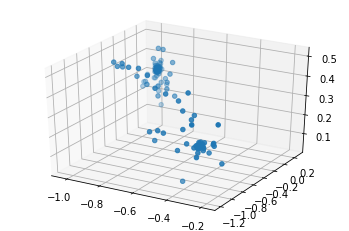

In [ ]:
def tracer_signal (df, capteur, action, sujet, essai):
  x = []
  y = []
  z = []
  if (capteur==1):
    res = df[(df['Sujet'] == sujet) & (df['Essai'] == essai) & (df['Action'] == action) ]
    x = res.Accélèromètre_x
    y = res.Accélèromètre_y
    z = res.Accélèromètre_z
  else :
    res = df[(df['Sujet'] == sujet) & (df['Essai'] == essai) & (df['Action'] == action) ]
    x = res.Gyroscope_x
    y = res.Gyroscope_y
    z = res.Gyroscope_z

  ax = plt.axes(projection='3d')
  ax.scatter3D(x, y, z)

tracer_signal(df, 1, '24', '7', '3')

In [ ]:
def feature_extraction (df):
  vecteurs = []
  for i in range (1,28):
    df_temp = df[(df['Action'] == str(i) )]
    Ax_mean = df_temp['Accélèromètre_x'].mean()
    Ax_std = df_temp['Accélèromètre_x'].std()
    Ay_mean = df_temp['Accélèromètre_y'].mean()
    Ay_std = df_temp['Accélèromètre_y'].std()
    Az_mean = df_temp['Accélèromètre_z'].mean()
    Az_std = df_temp['Accélèromètre_z'].std()
    Gx_mean = df_temp['Gyroscope_x'].mean()
    Gx_std = df_temp['Gyroscope_x'].std()
    Gy_mean = df_temp['Gyroscope_y'].mean()
    Gy_std = df_temp['Gyroscope_y'].std()
    Gz_mean = df_temp['Gyroscope_z'].mean()
    Gz_std = df_temp['Gyroscope_z'].std()
    V = [Ax_mean, Ax_std, Ay_mean,Ay_std, Az_mean,Az_std, Gx_mean, Gx_std, Gy_mean,  Gy_std, Gz_mean, Gz_std]
    vecteurs.append(V)
  return vecteurs

feature_extraction(df)

[[-0.6811319089320388,
  0.4749913702832942,
  -0.2584349889320388,
  0.5406395768231316,
  -0.26932655067961164,
  0.3939117917579711,
  23.58116356660194,
  95.72931891072523,
  -2.182411626213592,
  80.7564972502071,
  -18.731051657669905,
  119.99738608778206],
 [-0.6126190778491172,
  0.5329338394909675,
  -0.19636199578651686,
  0.5210523086669354,
  -0.3409743206260032,
  0.3860406463649478,
  -37.96528126565008,
  110.38529685980018,
  -17.45884847371589,
  96.34731731415872,
  12.834058295545747,
  103.06567505240946],
 [-0.4273957590835869,
  0.7393987064601936,
  -0.18090196008591372,
  0.9226818388113551,
  -0.15865544818328262,
  0.3726728609280281,
  4.838609801682477,
  167.4998341945511,
  -6.917864121711115,
  103.2894213083058,
  -8.748782954179344,
  173.04748845268827],
 [-0.35102282224352827,
  0.8442686915111396,
  -0.4879085098753595,
  0.43798064668262365,
  -0.13331463873441995,
  0.7351666156653649,
  9.504567710642378,
  67.21898420364684,
  -5.06083303470757

In [ ]:
df_train = df[(df['Sujet'] == str((1 | 3  | 5 | 7 ) ))]
columns = df.columns
print (df_train)
i = 5
moy = df_train[columns[i]].mean()
std = df_train[columns[i]].std()
df_train[columns[i]] = (df_train[columns[i]] - moy) / std
print (moy)
print (std)
print (df_train)

     Accélèromètre_x  Accélèromètre_y  Accélèromètre_z  Gyroscope_x  \
0          -1.019531        -0.001953        -0.173096     6.992366   
1          -0.987549        -0.009521        -0.155518    51.572519   
2          -1.002441        -0.140381        -0.426025    87.938931   
3          -1.091309        -0.266846        -0.768555    79.297710   
4          -1.221436        -0.104004        -0.887207    62.106870   
..               ...              ...              ...          ...   
136        -1.004150        -0.169922         0.074463    -2.412214   
137        -1.000977        -0.150879         0.058838    -2.687023   
138        -1.011475        -0.145264         0.045654    -2.900763   
139        -1.013184        -0.134033         0.039063    -3.145038   
140        -1.011475        -0.126953         0.033691    -3.786260   

     Gyroscope_y  Gyroscope_z Sujet Essai Action  
0      18.870229     6.198473     7     2      8  
1      29.038168    11.755725     7     2    

<ipython-input-26-41b0065cc399>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[columns[i]] = (df_train[columns[i]] - moy) / std


In [ ]:
vecteurs = feature_extraction(df)
vecteurs [1][1]

0.5329338394909675

In [ ]:
def preparation (df):
  columns = df.columns
  for i in range (155637):
    df['Accélèromètre_x'][i]= ((df['Accélèromètre_x'][i]-vecteurs[df['Action'][i]-1][0]))/vecteurs[df['Action'][i]-1][1]
    df['Accélèromètre_y'][i]= ((df['Accélèromètre_y'][i]-vecteurs[df['Action'][i]-1][0]))/vecteurs[df['Action'][i]-1][1]
    df['Accélèromètre_z'][i]= ((df['Accélèromètre_z'][i]-vecteurs[df['Action'][i]-1][0]))/vecteurs[df['Action'][i]-1][1]
    df['Gyroscope_x'][i]= ((df['Gyroscope_x'][i]-vecteurs[df['Action'][i]-1][0]))/vecteurs[df['Action'][i]-1][1]
    df['Gyroscope_y'][i]= ((df['Gyroscope_y'][i]-vecteurs[df['Action'][i]-1][0]))/vecteurs[df['Action'][i]-1][1]
    df['Gyroscope_z'][i]= ((df['Gyroscope_z'][i]-vecteurs[df['Action'][i]-1][0]))/vecteurs[df['Action'][i]-1][1]
  df_train = df[(df['Sujet'] == str((1 | 3  | 5 | 7 ) ))]
  df_test = df[(df['Sujet'] == str((2 | 4  | 6 | 8 ) ))]
  print (data_train)
  return df_train

preparation(df)
  #feature_extraction(df_train)
  #feature_extraction(df_test)

In [ ]:
df.loc[0,['Accélèromètre_x']]

,Accélèromètre_x
0,-0.991455
0,-0.996826
0,-0.991211
0,-0.957520
0,-0.994385
...,...
0,-0.982666
0,-0.986816
0,-1.007813
0,-0.988281


In [ ]:
df.loc[df.index[3], 'Accélèromètre_x']

3   -0.993408
3   -0.989746
3   -0.993164
3   -0.964600
3   -1.002197
       ...   
3   -0.965820
3   -0.992676
3   -1.012451
3   -0.962158
3   -0.997070
Name: Accélèromètre_x, Length: 861, dtype: float64